In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv("./dataset/DM1_game_dataset.csv")
df_to_be_modified = pd.read_csv("./dataset/DM1_game_dataset.csv")

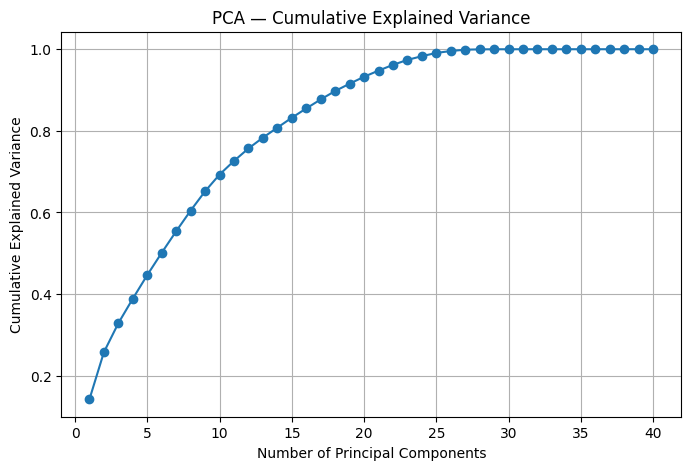

PC1: 14.23% variance (14.23% cumulative)
PC2: 11.53% variance (25.76% cumulative)
PC3: 7.11% variance (32.87% cumulative)
PC4: 6.01% variance (38.88% cumulative)
PC5: 5.78% variance (44.66% cumulative)
PC6: 5.46% variance (50.12% cumulative)
PC7: 5.27% variance (55.39% cumulative)
PC8: 5.06% variance (60.45% cumulative)
PC9: 4.73% variance (65.19% cumulative)
PC10: 4.10% variance (69.28% cumulative)
PC11: 3.34% variance (72.63% cumulative)
PC12: 3.05% variance (75.68% cumulative)
PC13: 2.65% variance (78.33% cumulative)
PC14: 2.45% variance (80.78% cumulative)
PC15: 2.43% variance (83.20% cumulative)
PC16: 2.28% variance (85.49% cumulative)
PC17: 2.20% variance (87.69% cumulative)
PC18: 2.07% variance (89.76% cumulative)
PC19: 1.78% variance (91.54% cumulative)
PC20: 1.71% variance (93.25% cumulative)
PC21: 1.50% variance (94.75% cumulative)
PC22: 1.41% variance (96.17% cumulative)
PC23: 1.22% variance (97.39% cumulative)
PC24: 0.91% variance (98.29% cumulative)
PC25: 0.80% variance (9

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Select only numeric columns
df_num = df.select_dtypes(include=['float64', 'int64']).dropna()

#Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

#Explained variance ratio (each component)
explained_var = pca.explained_variance_ratio_
cumulative_var = np.cumsum(explained_var)

#Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_var)+1), cumulative_var, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA — Cumulative Explained Variance')
plt.grid(True)
plt.show()

#Print results
for i, (ev, cv) in enumerate(zip(explained_var, cumulative_var), start=1):
    print(f"PC{i}: {ev*100:.2f}% variance ({cv*100:.2f}% cumulative)")

#Find number of components needed for 95% variance
n_components_95 = np.argmax(cumulative_var >= 0.95) + 1
print(f"\n {n_components_95} components explain 95% of the total variance.")


## 1. Deleting the numcomments

In [21]:
df_to_be_modified = df_to_be_modified.drop(labels = "NumComments", axis = 1)

## 2. Understanding commaxplaytime and mfgplaytime

In [22]:
df_to_be_modified[df_to_be_modified["MfgPlaytime"] == df_to_be_modified["ComMaxPlaytime"]]["BGGId"].count()

np.int64(21925)

In [23]:
df_to_be_modified["ComMaxPlaytime"].sort_values(ascending = False)[0:10]

4349     60000
19044    22500
1713     17280
15642    14400
8120     12000
18374    12000
8052     10000
2059      8640
14258     7920
3497      6000
Name: ComMaxPlaytime, dtype: int64

In [24]:
df_to_be_modified["ComMaxPlaytime"].mean()

np.float64(90.51352337514253)

In [25]:
df_to_be_modified["ComMaxPlaytime"].median()

np.float64(45.0)

In [26]:
# Decided to drop ComMaxPlaytime due to high number of missing values and inconsistencies with MfgPlaytime
df_to_be_modified = df_to_be_modified.drop(labels = "ComMaxPlaytime", axis = 1)

## 3. Correction of IsReimplementation 

In [27]:
# Fixing IsReimplementation based on NumImplementations
df_to_be_modified.loc[(df_to_be_modified["IsReimplementation"] == 0) & (df_to_be_modified["NumImplementations"] > 0), "IsReimplementation"] = 1

In [28]:
df_to_be_modified[(df_to_be_modified["IsReimplementation"] == 0) & (df_to_be_modified["NumImplementations"] > 0)]

,BGGId,Name,Description,YearPublished,GameWeight,ComWeight,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,...,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Rating


## 4. Deleting Comweight because it's Gameweight + random noise

In [29]:
# weighted comweight
df_to_be_modified = df_to_be_modified.drop(labels = "ComWeight", axis = 1)

## 5. Deleting BestPlayers due to the high number of missing values (90%)

In [30]:
df_to_be_modified = df_to_be_modified.drop(labels = "BestPlayers", axis = 1)

## 6. Replacing GameWeight missing values (<1)

In [57]:
# grouping gameweight values by category
categories = ["Cat:Thematic", "Cat:Strategy", "Cat:War", "Cat:Family", "Cat:CGS", "Cat:Abstract", "Cat:Party", "Cat:Childrens"]
df_to_be_modified["NoCategory"] = (df_to_be_modified[categories].sum(axis=1) == 0).astype(int)
# replacing 0 values in GameWeight with the mean GameWeight of the respective category
((df_to_be_modified["GameWeight"]==0) & df_to_be_modified["NoCategory"]==1).sum() # check how many have no category and gameweight 0


np.int64(478)

## 7. Replacing MinPlayers values == 0

In [ ]:
# replacing 0 values in MinPlayers (50) with the median MinPlayers of the dataset
df_to_be_modified["MinPlayers"].replace(0, df_to_be_modified["MinPlayers"].median(), inplace=True)
((df_to_be_modified["MinPlayers"]==0).sum()) # check how many have MinPlayers 0

C:\Users\leona\AppData\Local\Temp\ipykernel_20204\134290108.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_to_be_modified["MinPlayers"].replace(0, df_to_be_modified["MinPlayers"].median(), inplace=True)


np.int64(0)

## 8. Replacing MaxPlayers outliers and missing values

9.0


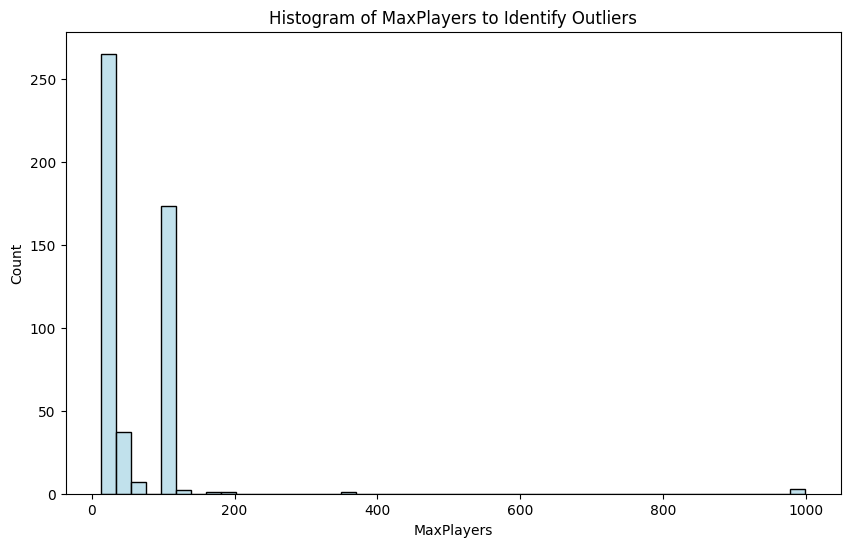

In [90]:
# outlier detection for MaxPlayers
q1 = df_to_be_modified["MaxPlayers"].quantile(0.25)
q3 = df_to_be_modified["MaxPlayers"].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
'''df_to_be_modified["MaxPlayers"] = df_to_be_modified["MaxPlayers"].apply(
    lambda x: df_to_be_modified["MaxPlayers"].median() if (x < lower_bound or x > upper_bound or x == 0) else x
)
((df_to_be_modified["MaxPlayers"]==0).sum()) # check how many have MaxPlayers 0'''
print(upper_bound)
df[df_to_be_modified["MaxPlayers"]>upper_bound][["MaxPlayers"]].sort_values(by= "MaxPlayers", ascending=True)
# plotting the outliers distribution
outliers = df[df_to_be_modified["MaxPlayers"]>12][["MaxPlayers"]]
plt.figure(figsize=(10,6))
sns.histplot(x=outliers["MaxPlayers"], color='lightblue')
plt.title("Histogram of MaxPlayers to Identify Outliers")
plt.xlabel("MaxPlayers")
plt.show()